In [ ]:
#  Importar librerías esenciales para EDA
# 1 Cargar el dataset
import pandas as pd       # Datos
import numpy as np        # Calculos numericos
import matplotlib.pyplot as plt  # Graficos
import seaborn as sns     # visualizaciones

#  estilo grafico
sns.set(style="whitegrid")



In [ ]:
# revision de las tablas dentro del dataset
# 2 Exploración inicial

import pandas as pd

# url del dataset
url = "https://www.datos.gov.co/resource/9mey-c8s8.csv"

# Leer directamente desde la sitio web
df = pd.read_csv(url)

df.head()



,a_o,trimestre,proveedor,cod_departamento,departamento,cod_municipio,municipio,cabecera_municipal,cod_centro_poblado,centro_poblado,cobertura_2g,cobertura_3g,cobertura_hspa_hspa_dc,cobertuta_4g,cobertura_lte,cobertura_5g
0,2023,3,COLOMBIA MOVIL S.A ESP,27,CHOCÓ,27250,EL LITORAL DEL SAN JUAN,N,27250034,TORDÓ,N,N,N,S,N,N
1,2023,3,COLOMBIA TELECOMUNICACIONES S.A. E.S.P.,5,ANTIOQUIA,5495,NECHÍ,N,5495003,LA CONCHA,S,S,S,S,N,N
2,2022,3,COLOMBIA MOVIL S.A ESP,70,SUCRE,70508,OVEJAS,N,70508006,DON GABRIEL,N,N,N,S,N,N
3,2021,4,AVANTEL S.A.S,73,TOLIMA,73043,ANZOÁTEGUI,S,73043000,ANZOÁTEGUI,S,S,S,N,N,N
4,2021,2,COMUNICACION CELULAR S A COMCEL S A,50,META,50150,CASTILLA LA NUEVA,N,50150001,SAN LORENZO,S,S,S,S,N,N


In [ ]:
# Número de filas y columnas
# 3 Estadísticas descriptivas
print("Filas y columnas:", df.shape)

# Tipos de datos por columna
df.dtypes


Filas y columnas: (1000, 16)


,0
a_o,int64
trimestre,int64
proveedor,object
cod_departamento,int64
departamento,object
cod_municipio,int64
municipio,object
cabecera_municipal,object
cod_centro_poblado,int64
centro_poblado,object


In [ ]:
# Conteo de nulos por columna
# 4 Detección de valores nulos
df.isnull().sum()

# Porcentaje de nulos
(df.isnull().sum() / len(df)) * 100


,0
a_o,0.0
trimestre,0.0
proveedor,0.0
cod_departamento,0.0
departamento,0.0
cod_municipio,0.0
municipio,0.0
cabecera_municipal,0.0
cod_centro_poblado,0.0
centro_poblado,0.0


In [ ]:
# Lista de columnas de cobertura
# 5 Conversión de columnas de cobertura a numéricas
cols_cobertura = ['cobertura_2g','cobertura_3g','cobertura_hspa_hspa_dc','cobertuta_4g','cobertura_lte','cobertura_5g']

# Convertir a numéricas
for col in cols_cobertura:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Verificar
df[cols_cobertura].dtypes



,0
cobertura_2g,float64
cobertura_3g,float64
cobertura_hspa_hspa_dc,float64
cobertuta_4g,float64
cobertura_lte,float64
cobertura_5g,float64


Columnas numéricas detectadas: ['a_o', 'trimestre', 'cod_departamento', 'cod_municipio', 'cod_centro_poblado', 'cobertura_2g', 'cobertura_3g', 'cobertura_hspa_hspa_dc', 'cobertuta_4g', 'cobertura_lte', 'cobertura_5g']


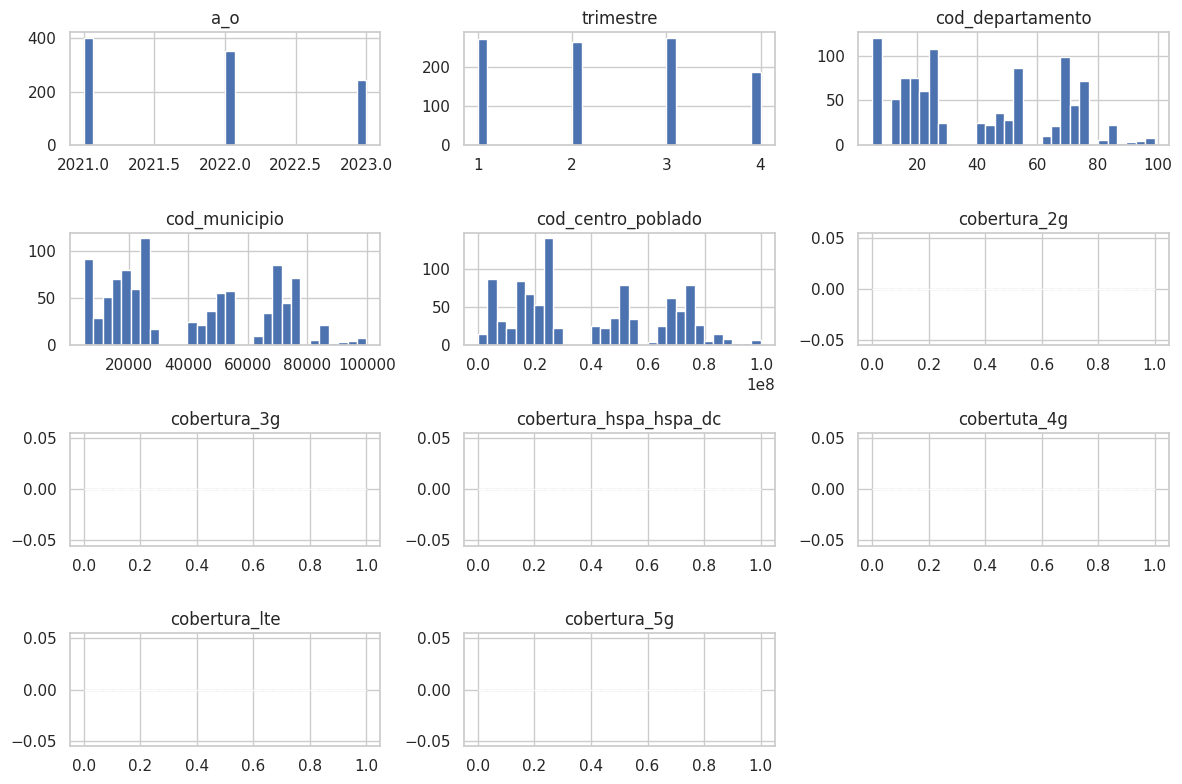

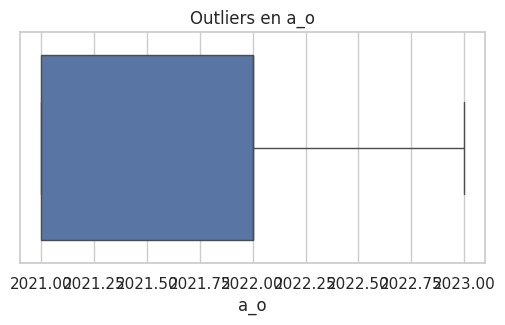

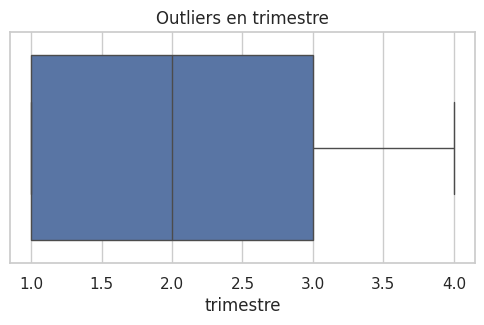

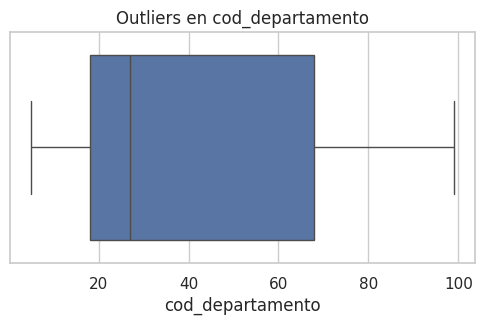

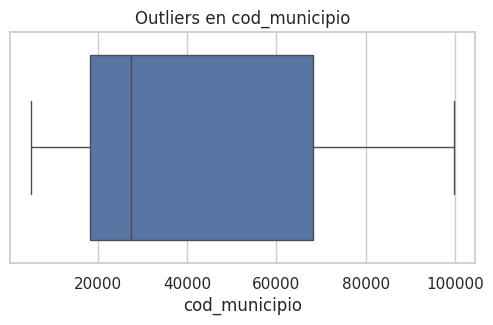

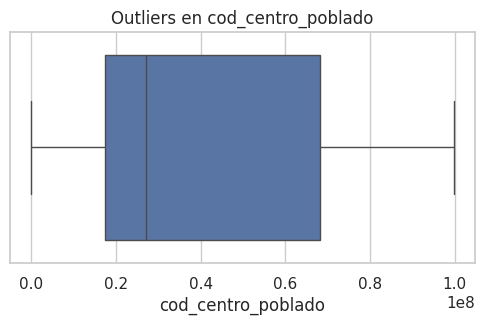

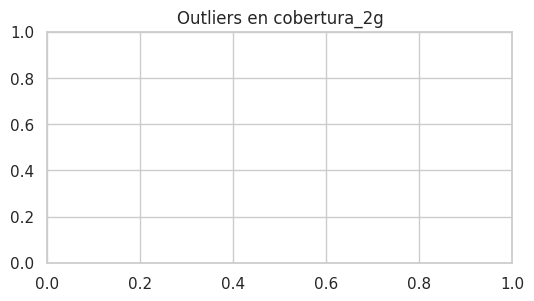

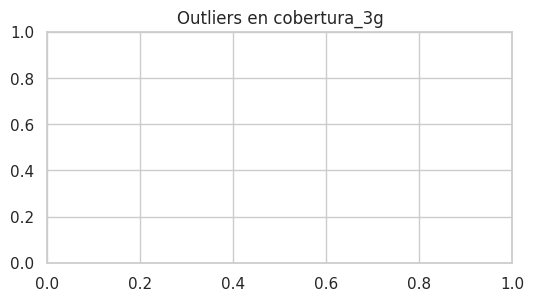

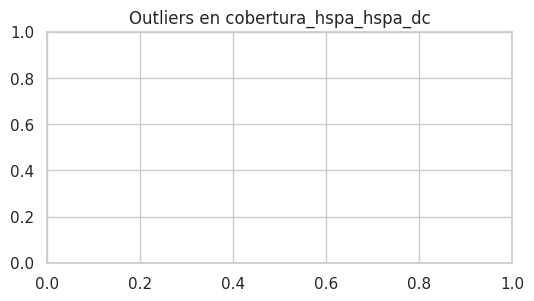

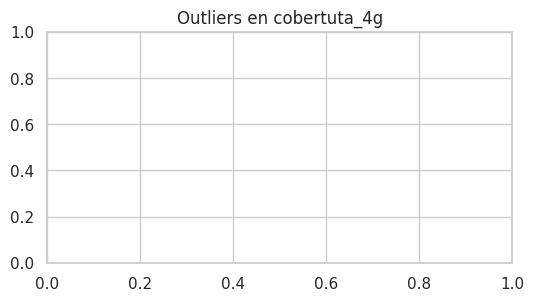

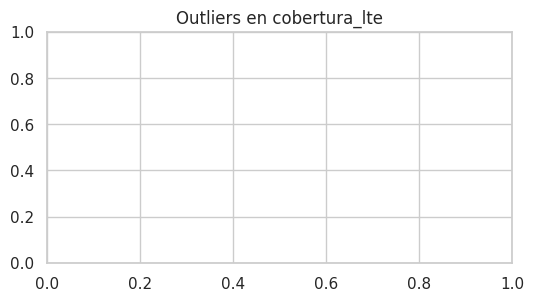

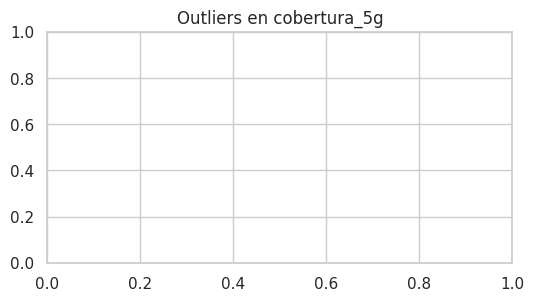

In [ ]:
# 6 Visualización de distribuciones y outliers

# Detectar
num_cols = df.select_dtypes(include=['float64','int64']).columns

print("Columnas numéricas detectadas:", num_cols.tolist())

# Histogramas
df[num_cols].hist(figsize=(12,8), bins=30)
plt.tight_layout()
plt.show()

for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col].dropna())
    plt.title(f'Outliers en {col}')
    plt.show()



### Hallazgos Día 2
- El dataset tiene filas (x) y columnas (y).
- Columnas con más nulos: La cobertura 5g y algunas coberturas avanzadas tenian mas nulos.
- Las columnas de cobertura ya están convertidas a numéricas.
- Los histogramas muestran que 2G y 3G tienen distribuciones más uniformes.
- LTE y 5G presentan mayor dispersión y valores faltantes.
- Se detectan outliers en algunas tecnologías, especialmente en cobertura LTE.


#Dia 3 EDA avanzado

In [ ]:
# 1 Importar librerias del data set
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Cargar dataset
url = "https://www.datos.gov.co/resource/9mey-c8s8.csv"
df = pd.read_csv(url)

# Nombres de las columnas
df.columns = (df.columns
              .str.lower()
              .str.strip()
              .str.replace(" ", "_", regex=False)
              .str.replace("-", "_", regex=False))

print("Columnas disponibles:", df.columns.tolist())


Columnas disponibles: ['a_o', 'trimestre', 'proveedor', 'cod_departamento', 'departamento', 'cod_municipio', 'municipio', 'cabecera_municipal', 'cod_centro_poblado', 'centro_poblado', 'cobertura_2g', 'cobertura_3g', 'cobertura_hspa_hspa_dc', 'cobertuta_4g', 'cobertura_lte', 'cobertura_5g']


In [ ]:
# 2 Detectar columnas de cobertura
# Patrones de tecnologia
pats = ["2g","3g","hspa","hspa_dc","4g","lte","5g"]

# columbas cobertura
cols_cobertura = [c for c in df.columns if any(p in c for p in pats)]
print("Columnas de cobertura detectadas:", cols_cobertura)


Columnas de cobertura detectadas: ['cobertura_2g', 'cobertura_3g', 'cobertura_hspa_hspa_dc', 'cobertuta_4g', 'cobertura_lte', 'cobertura_5g']


In [ ]:
# 3 Convertir valores si (S) y no (N) a 1 y 0
for col in cols_cobertura:
    df[col] = df[col].map({'S': 1, 'N': 0}).fillna(0).astype(int)

print("\nValores únicos y varianza después de la conversión:")
for col in cols_cobertura:
    print(f"{col}: Únicos = {df[col].nunique()}, Varianza = {df[col].var():.4f}")



Valores únicos y varianza después de la conversión:
cobertura_2g: Únicos = 2, Varianza = 0.2031
cobertura_3g: Únicos = 2, Varianza = 0.1672
cobertura_hspa_hspa_dc: Únicos = 2, Varianza = 0.2048
cobertuta_4g: Únicos = 2, Varianza = 0.2432
cobertura_lte: Únicos = 2, Varianza = 0.0301
cobertura_5g: Únicos = 1, Varianza = 0.0000


In [ ]:
# Calcular matriz de correlación
corr = df[cols_cobertura].corr(method='pearson')
print(corr)


                        cobertura_2g  cobertura_3g  cobertura_hspa_hspa_dc  \
cobertura_2g                1.000000      0.298752                0.205031   
cobertura_3g                0.298752      1.000000                0.806722   
cobertura_hspa_hspa_dc      0.205031      0.806722                1.000000   
cobertuta_4g                0.005729      0.281985                0.267341   
cobertura_lte               0.073945      0.050424                0.049705   
cobertura_5g                     NaN           NaN                     NaN   

                        cobertuta_4g  cobertura_lte  cobertura_5g  
cobertura_2g                0.005729       0.073945           NaN  
cobertura_3g                0.281985       0.050424           NaN  
cobertura_hspa_hspa_dc      0.267341       0.049705           NaN  
cobertuta_4g                1.000000      -0.211923           NaN  
cobertura_lte              -0.211923       1.000000           NaN  
cobertura_5g                     NaN         

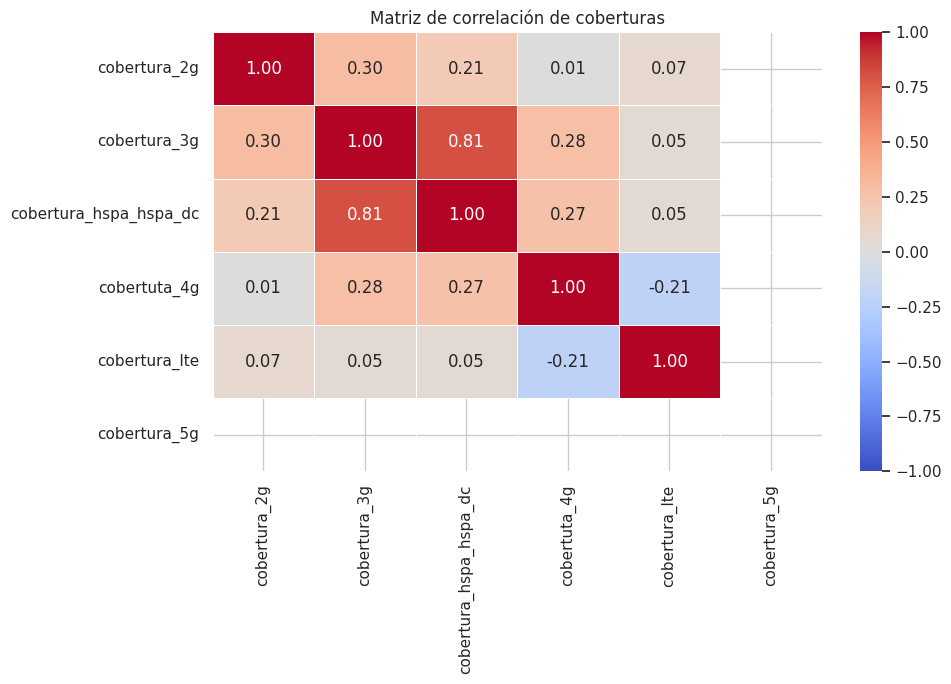

In [ ]:
# 5 Grafico de mapa de calor
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm",
            vmin=-1, vmax=1, linewidths=0.5)
plt.title("Matriz de correlación de coberturas")
plt.tight_layout()
plt.show()


In [ ]:
# 6 Agrupar por departamento y calcular el promedio de coberturas
depto_mean = df.groupby("departamento")[cols_cobertura].mean() * 100

print(depto_mean.head())

                                                    cobertura_2g  \
departamento                                                       
AMAZONAS                                               66.666667   
ANTIOQUIA                                              63.636364   
ARAUCA                                                 66.666667   
ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA...      0.000000   
ATLÁNTICO                                              84.375000   

                                                    cobertura_3g  \
departamento                                                       
AMAZONAS                                               33.333333   
ANTIOQUIA                                              77.272727   
ARAUCA                                                 66.666667   
ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA...    100.000000   
ATLÁNTICO                                              93.750000   

                                              

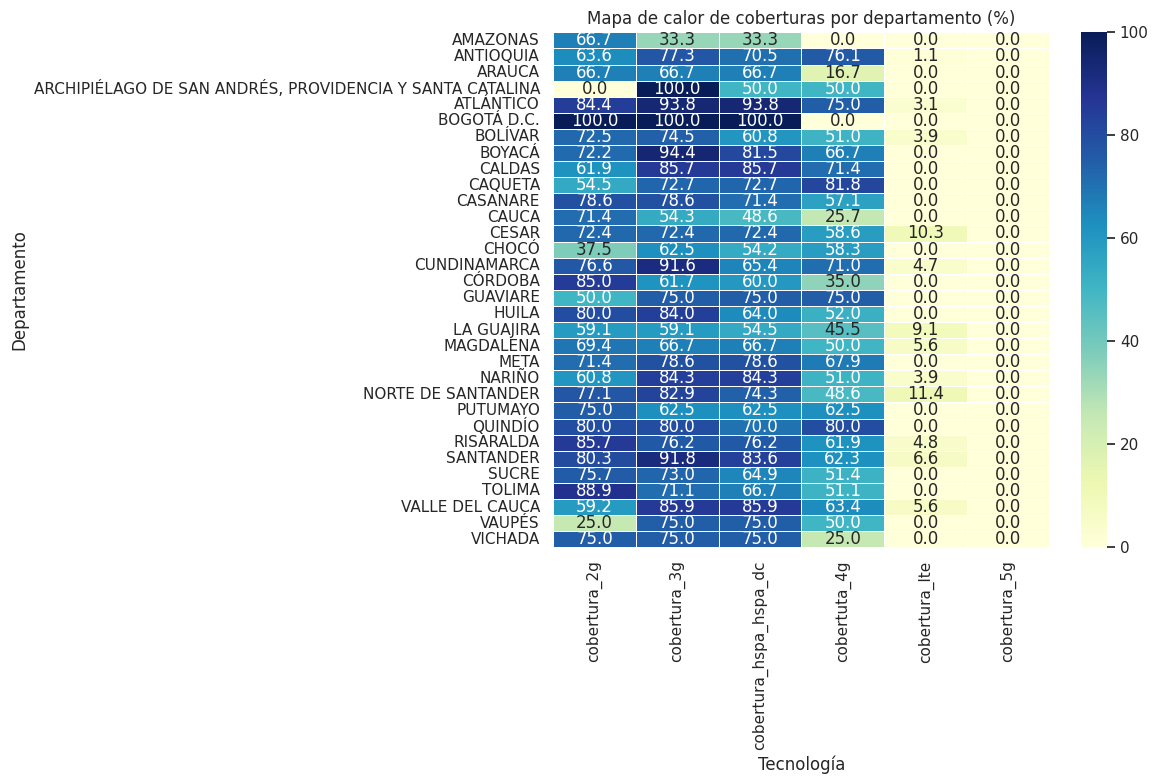

In [ ]:
# 7 Mapa de calor por departamento
plt.figure(figsize=(12,8))
sns.heatmap(depto_mean, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=0.5)
plt.title("Mapa de calor de coberturas por departamento (%)")
plt.ylabel("Departamento")
plt.xlabel("Tecnología")
plt.tight_layout()
plt.show()


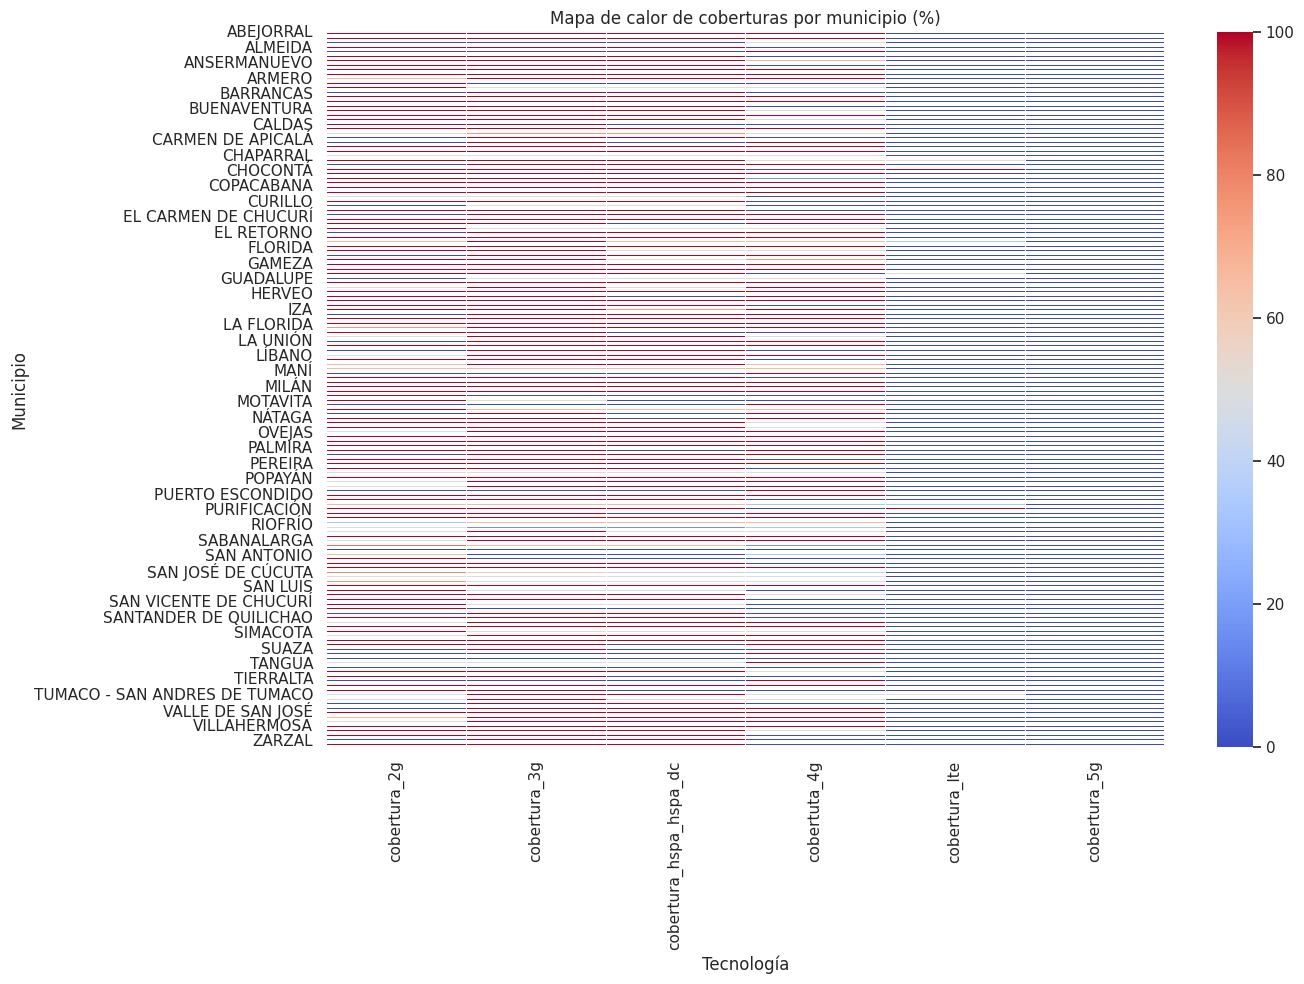

In [ ]:
# mapa de calor por municipio
mpio_mean = df.groupby("municipio")[cols_cobertura].mean() * 100

plt.figure(figsize=(14,10))
sns.heatmap(mpio_mean, cmap="coolwarm", linewidths=0.5)
plt.title("Mapa de calor de coberturas por municipio (%)")
plt.ylabel("Municipio")
plt.xlabel("Tecnología")
plt.tight_layout()
plt.show()

### Hallazgos Día 3
- El mapa de calor muestra correlaciones entre tecnologías, con 3G y HSPA más relacionadas y 5G con correlaciones bajas por falta de datos.
- El dataset se agrupó por departamento para calcular el promedio de coberturas, observando que 2G y 3G están más extendidas, mientras que LTE y 5G presentan menor presencia y desigualdad regional.
- El mapa de calor por departamento evidencia brechas claras: algunos departamentos tienen buena cobertura en 4G/LTE, mientras otros apenas cuentan con 2G o 3G.
- El análisis por municipio muestra mayor dispersión, con municipios que tienen cobertura completa en varias tecnologías y otros con valores muy bajos o nulos, especialmente en LTE y 5G.
- Se identifican municipios con valores extremos en LTE, lo que confirma la presencia de outliers también a nivel territorial.


# dia 4

In [1]:
# 1 Preparación del entorno y carga de datos
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración visual
plt.style.use("seaborn-v0_8")
sns.set(font_scale=1.0)
pd.set_option("display.max_columns", 100)

# Cargar dataset
url = "https://www.datos.gov.co/resource/9mey-c8s8.csv"
df = pd.read_csv(url)

# Normalizar nombres de columnas
df.columns = (
    df.columns.str.strip()
              .str.lower()
              .str.replace(" ", "_")
              .str.replace("-", "_")
)

# Ver columnas clave disponibles
df.columns.tolist()[:30]


['a_o',
 'trimestre',
 'proveedor',
 'cod_departamento',
 'departamento',
 'cod_municipio',
 'municipio',
 'cabecera_municipal',
 'cod_centro_poblado',
 'centro_poblado',
 'cobertura_2g',
 'cobertura_3g',
 'cobertura_hspa_hspa_dc',
 'cobertuta_4g',
 'cobertura_lte',
 'cobertura_5g']

In [5]:
# 2 Selección de columnas de cobertura y limpieza básica
# Detectar
candidatas = ["2g", "3g", "hspa", "hspa_dc", "4g", "lte", "5g"]
cols_cobertura = [c for c in df.columns if any(cob in c for cob in candidatas)]

print("Columnas de cobertura detectadas:", cols_cobertura)

# Validar columna de municipio y departamento
col_mpio = "municipio" if "municipio" in df.columns else "nombre_municipio"
col_depto = "departamento" if "departamento" in df.columns else "nombre_departamento"

# Convertir valores tipo "S"/"N" a 1/0 y asegurar numérico
map_sn = {"S": 1, "N": 0, "Sí": 1, "No": 0, "si": 1, "no": 0, True: 1, False: 0}
for c in cols_cobertura:
    df[c] = df[c].replace(map_sn)
    df[c] = pd.to_numeric(df[c], errors="coerce").fillna(0)

# Verificar primeras filas
df[cols_cobertura].head()



Columnas de cobertura detectadas: ['cobertura_2g', 'cobertura_3g', 'cobertura_hspa_hspa_dc', 'cobertuta_4g', 'cobertura_lte', 'cobertura_5g']


,cobertura_2g,cobertura_3g,cobertura_hspa_hspa_dc,cobertuta_4g,cobertura_lte,cobertura_5g
0,0,0,0,1,0,0
1,1,1,1,1,0,0
2,0,0,0,1,0,0
3,1,1,1,0,0,0
4,1,1,1,1,0,0


In [7]:
# 3 Promedios y rankings por municipio
# Promedio de cobertura por municipio
mpio_mean = df.groupby(col_mpio)[cols_cobertura].mean().mul(100).round(2)
mpio_mean.head()

# TOP 10 municipios con mayor cobertura en LTE y 5G
top_mpio_lte = mpio_mean.sort_values(by="cobertura_lte", ascending=False).head(10)
top_mpio_5g  = mpio_mean.sort_values(by="cobertura_5g",  ascending=False).head(10)

# BOTTOM 10 municipios con menor cobertura en LTE y 5G
bottom_mpio_lte = mpio_mean.sort_values(by="cobertura_lte", ascending=True).head(10)
bottom_mpio_5g  = mpio_mean.sort_values(by="cobertura_5g",  ascending=True).head(10)

top_mpio_lte, top_mpio_5g, bottom_mpio_lte, bottom_mpio_5g

(                  cobertura_2g  cobertura_3g  cobertura_hspa_hspa_dc  \
 municipio                                                              
 CURUMANÍ                 100.0         100.0                   100.0   
 DISTRACCIÓN              100.0         100.0                   100.0   
 SAN ALBERTO              100.0         100.0                   100.0   
 LA CEJA                  100.0         100.0                   100.0   
 PUPIALES                 100.0         100.0                   100.0   
 FONSECA                    0.0           0.0                   100.0   
 CHIMA                    100.0         100.0                   100.0   
 BUCARAMANGA              100.0         100.0                   100.0   
 PALMAR DE VARELA         100.0         100.0                   100.0   
 CHIPAQUE                 100.0         100.0                   100.0   
 
                   cobertuta_4g  cobertura_lte  cobertura_5g  
 municipio                                                 

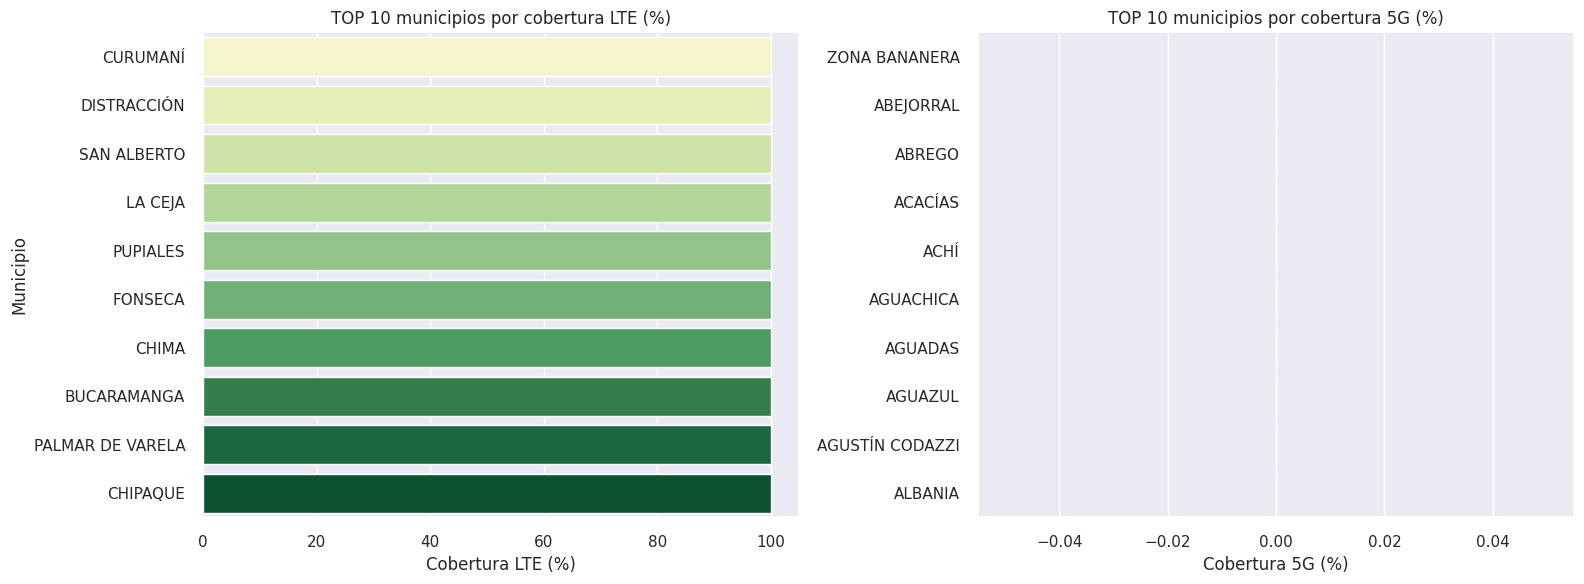

In [10]:
# Visualización: barras TOP 10 LTE y 5G
fig, axes = plt.subplots(1, 2, figsize=(16,6))

sns.barplot(x=top_mpio_lte["cobertura_lte"], y=top_mpio_lte.index, hue=top_mpio_lte.index, ax=axes[0], palette="YlGn", legend=False)
axes[0].set_title("TOP 10 municipios por cobertura LTE (%)")
axes[0].set_xlabel("Cobertura LTE (%)")
axes[0].set_ylabel("Municipio")

sns.barplot(x=top_mpio_5g["cobertura_5g"], y=top_mpio_5g.index, hue=top_mpio_5g.index, ax=axes[1], palette="OrRd", legend=False)
axes[1].set_title("TOP 10 municipios por cobertura 5G (%)")
axes[1].set_xlabel("Cobertura 5G (%)")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()

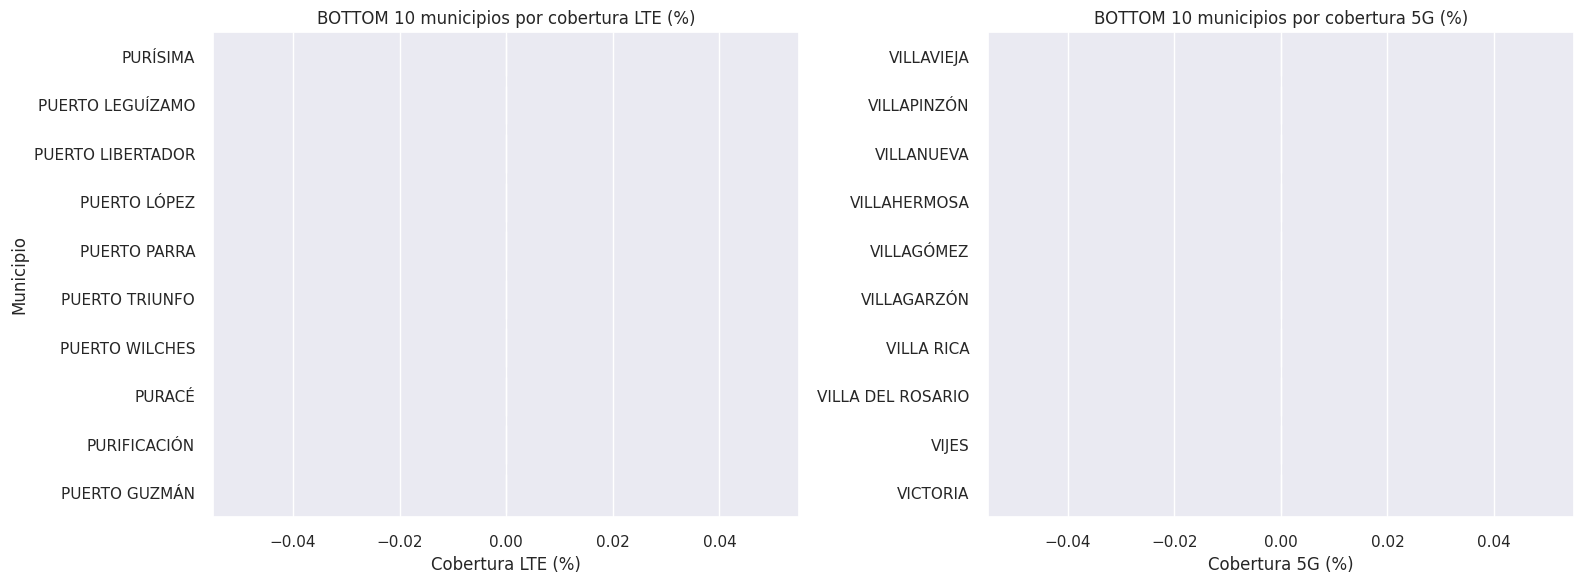

In [23]:
# barras BOTTOM 10 LTE y 5G
fig, axes = plt.subplots(1, 2, figsize=(16,6))

sns.barplot(x=bottom_mpio_lte["cobertura_lte"], y=bottom_mpio_lte.index, hue=bottom_mpio_lte.index, ax=axes[0], palette="Blues", legend=False)
axes[0].set_title("BOTTOM 10 municipios por cobertura LTE (%)")
axes[0].set_xlabel("Cobertura LTE (%)")
axes[0].set_ylabel("Municipio")

sns.barplot(x=bottom_mpio_5g["cobertura_5g"], y=bottom_mpio_5g.index, hue=bottom_mpio_5g.index, ax=axes[1], palette="Purples", legend=False)
axes[1].set_title("BOTTOM 10 municipios por cobertura 5G (%)")
axes[1].set_xlabel("Cobertura 5G (%)")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()

In [24]:
# Promedios y comparación por departamento
depto_mean = df.groupby(col_depto)[cols_cobertura].mean().mul(100).round(2)
depto_mean.head()


,cobertura_2g,cobertura_3g,cobertura_hspa_hspa_dc,cobertuta_4g,cobertura_lte,cobertura_5g
departamento,,,,,,
AMAZONAS,66.67,33.33,33.33,0.00,0.00,0.0
ANTIOQUIA,63.64,77.27,70.45,76.14,1.14,0.0
ARAUCA,66.67,66.67,66.67,16.67,0.00,0.0
"ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA CATALINA",0.00,100.00,50.00,50.00,0.00,0.0
ATLÁNTICO,84.38,93.75,93.75,75.00,3.12,0.0


In [26]:
# Comparar departamentos: 4G/LTE vs 2G/3G
comparacion = depto_mean[["cobertura_2g", "cobertura_3g", "cobertuta_4g", "cobertura_lte"]].sort_values(by="cobertura_lte", ascending=False)
comparacion.head(15)

,cobertura_2g,cobertura_3g,cobertuta_4g,cobertura_lte
departamento,,,,
NORTE DE SANTANDER,77.14,82.86,48.57,11.43
CESAR,72.41,72.41,58.62,10.34
LA GUAJIRA,59.09,59.09,45.45,9.09
SANTANDER,80.33,91.80,62.30,6.56
VALLE DEL CAUCA,59.15,85.92,63.38,5.63
MAGDALENA,69.44,66.67,50.00,5.56
RISARALDA,85.71,76.19,61.90,4.76
CUNDINAMARCA,76.64,91.59,71.03,4.67
BOLÍVAR,72.55,74.51,50.98,3.92


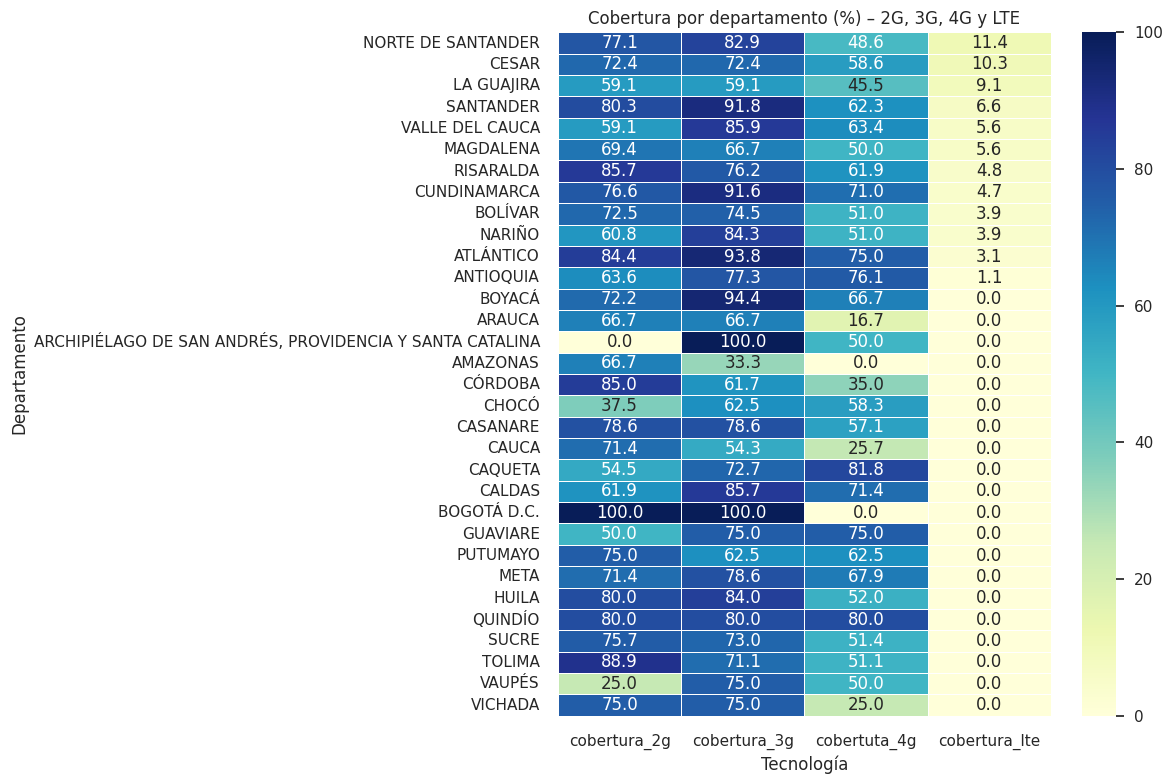

In [27]:
# mapa de calor de departamentos para tecnologías clave
plt.figure(figsize=(12,8))
sns.heatmap(comparacion, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=0.5)
plt.title("Cobertura por departamento (%) – 2G, 3G, 4G y LTE")
plt.ylabel("Departamento")
plt.xlabel("Tecnología")
plt.tight_layout()
plt.show()


In [29]:
# Exportación de tablas clave
# Guardar resultados a CSV para el informe
mpio_mean.to_csv("promedios_municipio.csv", encoding="utf-8")
depto_mean.to_csv("promedios_departamento.csv", encoding="utf-8")
top_mpio_lte.to_csv("top10_mpio_lte.csv", encoding="utf-8")
top_mpio_5g.to_csv("top10_mpio_5g.csv", encoding="utf-8")
bottom_mpio_lte.to_csv("bottom10_mpio_lte.csv", encoding="utf-8")
bottom_mpio_5g.to_csv("bottom10_mpio_5g.csv", encoding="utf-8")


### Hallazgos Día 4
- Se calcularon promedios de cobertura por municipio y departamento para cada tecnología.
- Se construyeron rankings de municipios con mayor y menor cobertura en LTE y 5G.
- Se observaron diferencias claras entre departamentos con mayor presencia de 4G/LTE y aquellos con predominio de 2G/3G.
- Se identificaron municipios con ausencia de tecnologías avanzadas, evidenciando brechas de conectividad.
- Los rankings confirman desigualdad territorial en el acceso a tecnologías móviles.


# Dia 5

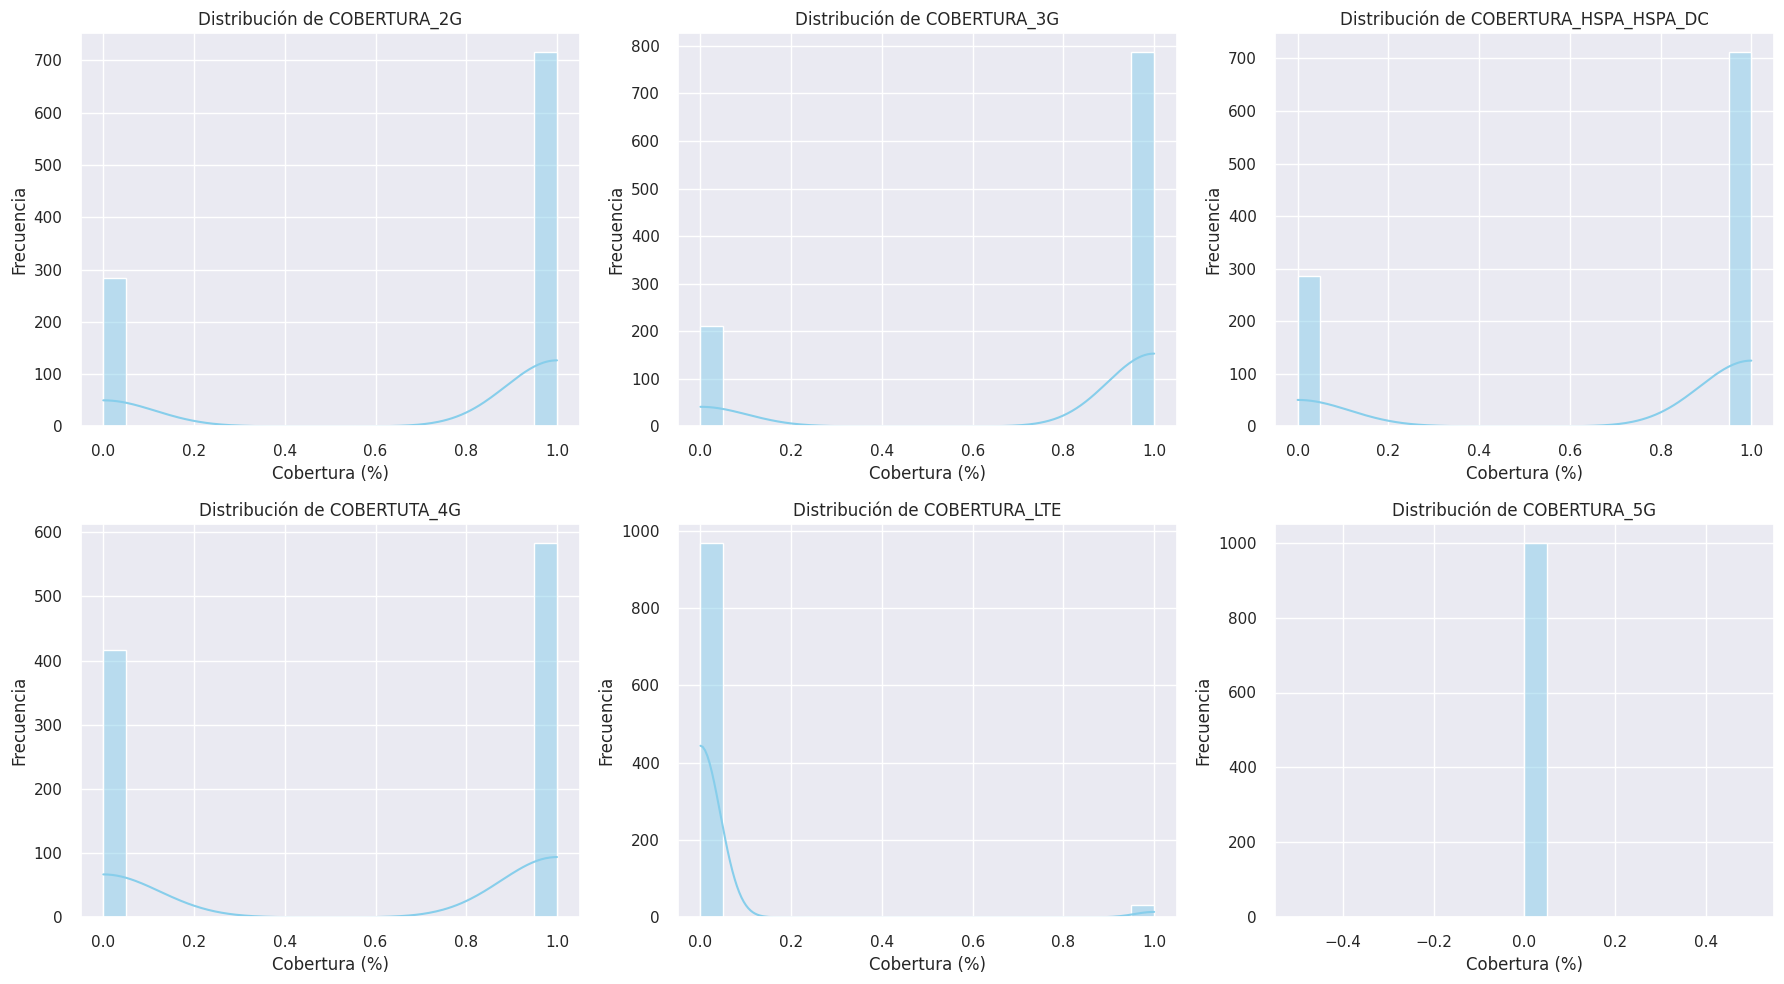

In [30]:
# 1. Histogramas comparativos por tecnología
# Histogramas de distribución de cobertura por tecnología
fig, axes = plt.subplots(2, 3, figsize=(18,10))

for i, col in enumerate(cols_cobertura):
    ax = axes[i//3, i%3]
    sns.histplot(df[col], bins=20, kde=True, ax=ax, color="skyblue")
    ax.set_title(f"Distribución de {col.upper()}")
    ax.set_xlabel("Cobertura (%)")
    ax.set_ylabel("Frecuencia")

plt.tight_layout()
plt.show()


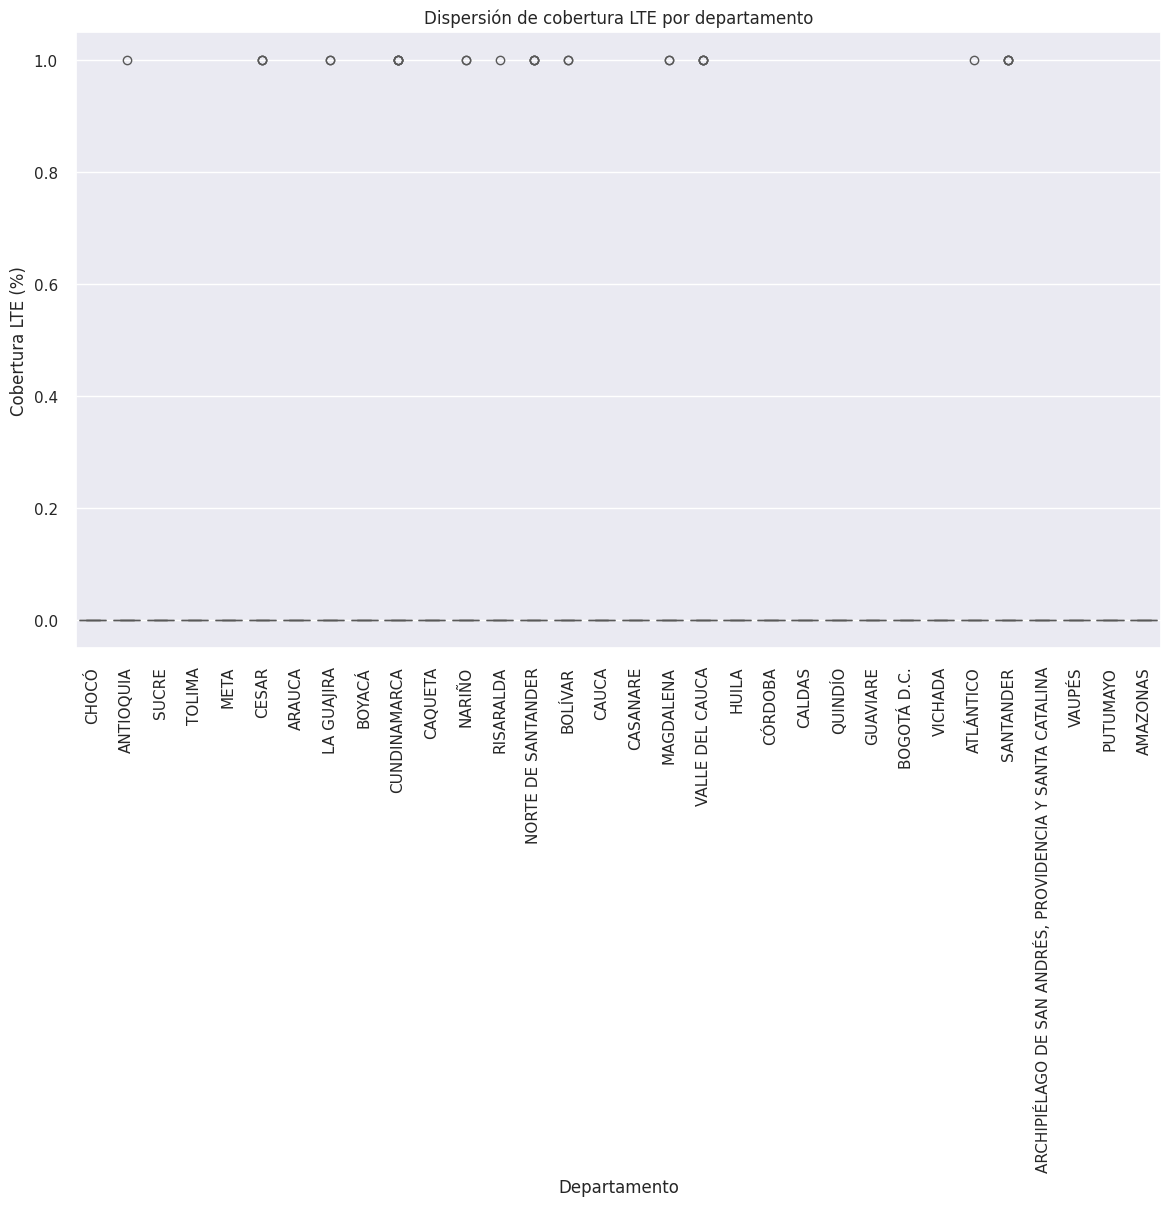

In [34]:
# Boxplots para comparar la dispersión de cobertura por departamento
plt.figure(figsize=(14,8))
sns.boxplot(data=df, x=col_depto, y="cobertura_lte", hue=col_depto, palette="Set2", legend=False)
plt.xticks(rotation=90)
plt.title("Dispersión de cobertura LTE por departamento")
plt.xlabel("Departamento")
plt.ylabel("Cobertura LTE (%)")
plt.show()

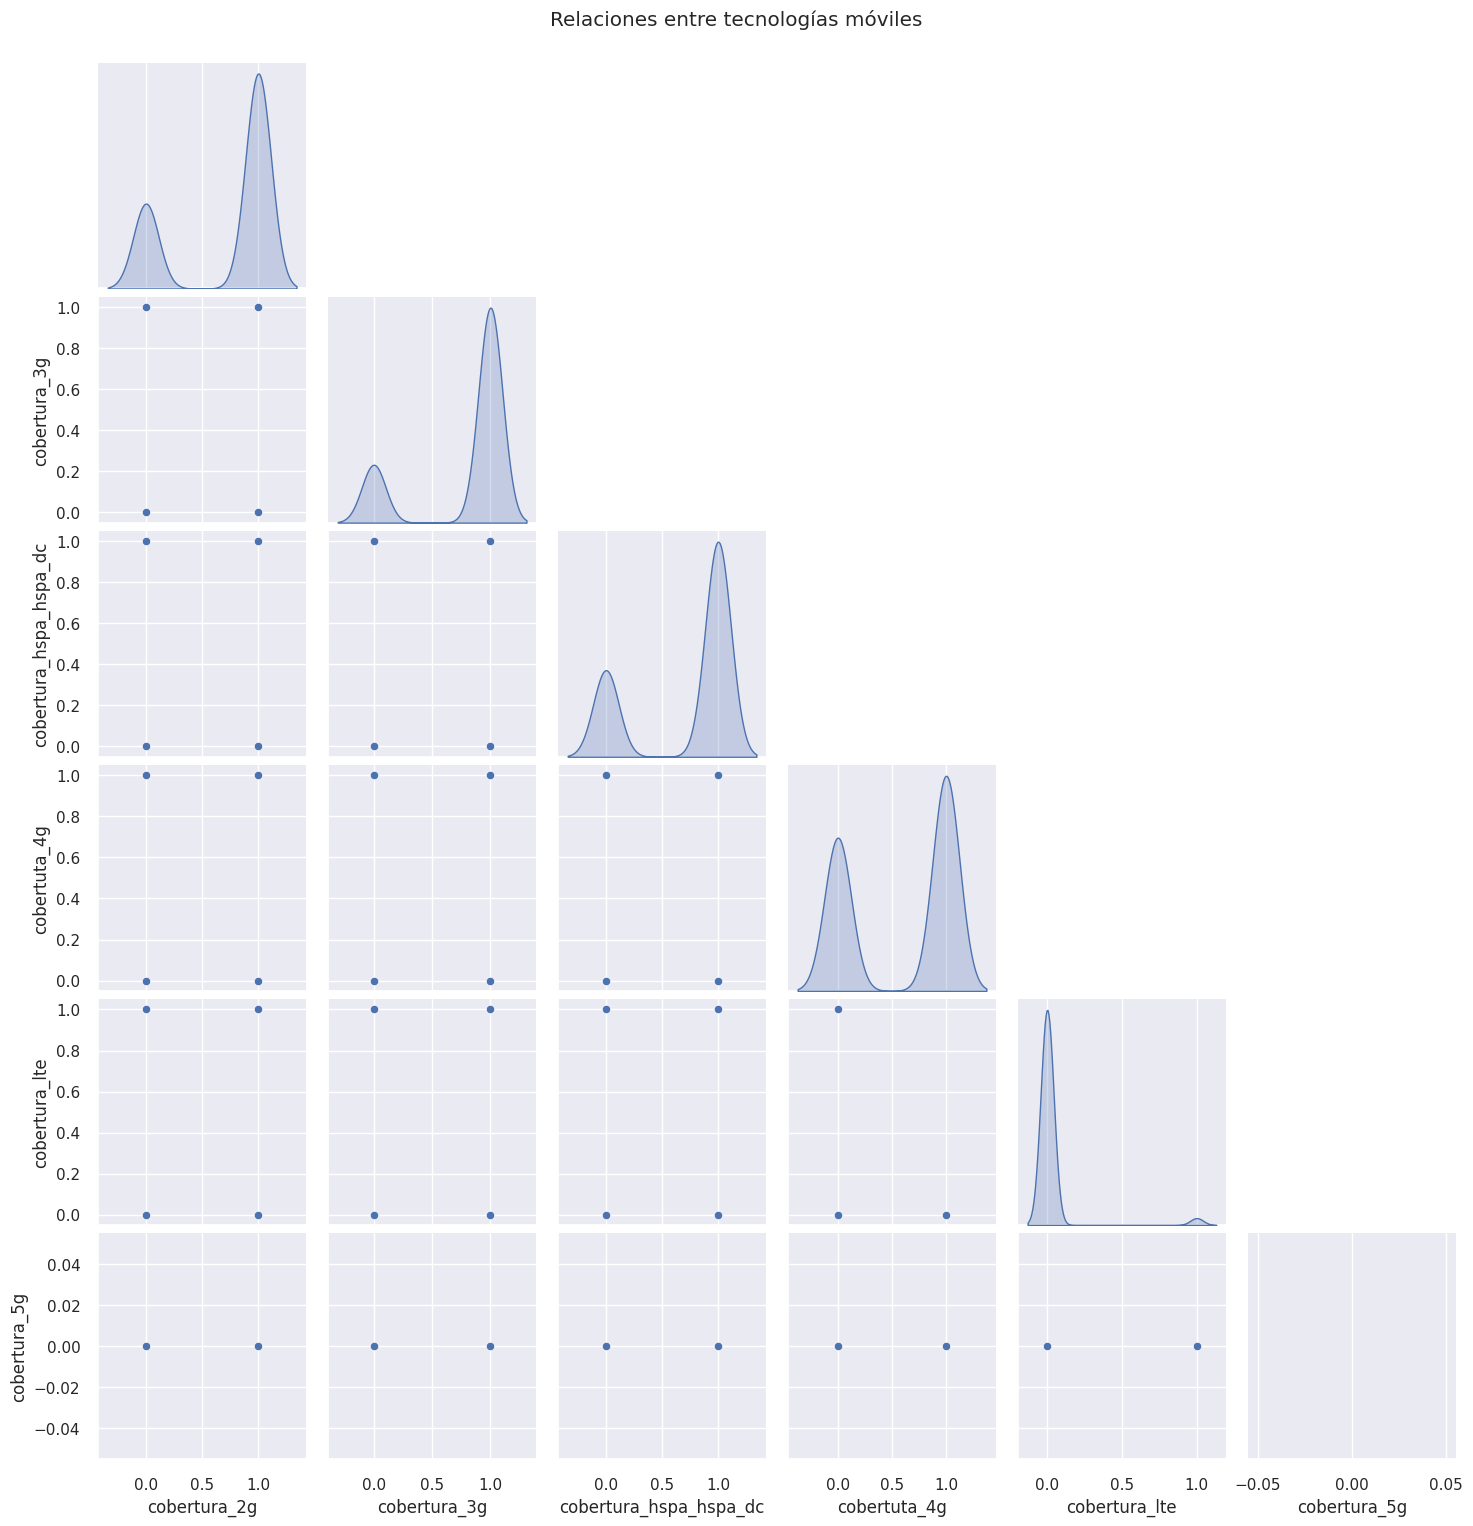

In [35]:
# 3. Pairplot de correlaciones entre tecnologías
sns.pairplot(df[cols_cobertura], diag_kind="kde", corner=True)
plt.suptitle("Relaciones entre tecnologías móviles", y=1.02)
plt.show()


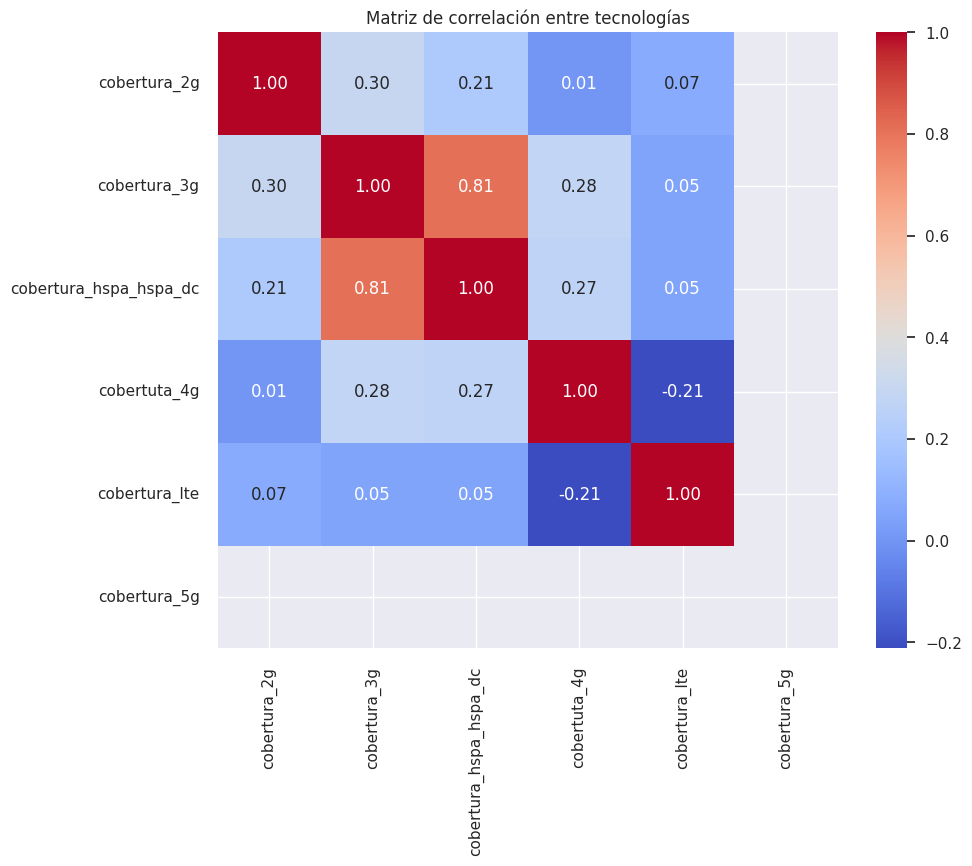

In [36]:
# 4. Mapa de calor de correlaciones actualizado
plt.figure(figsize=(10,8))
sns.heatmap(df[cols_cobertura].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación entre tecnologías")
plt.show()


### Hallazgos Día 5
- Los histogramas muestran distribuciones distintas: 2G y 3G más uniformes, LTE y 5G más dispersas.
- Los boxplots evidencian desigualdad territorial: algunos departamentos concentran alta cobertura LTE, otros apenas tienen valores bajos.
- El pairplot confirma correlaciones fuertes entre 3G y HSPA, mientras que 5G se mantiene con baja relación por falta de datos.
- El heatmap actualizado refuerza la idea de que las tecnologías avanzadas aún no están homogéneamente distribuidas en el país.


# dia 6

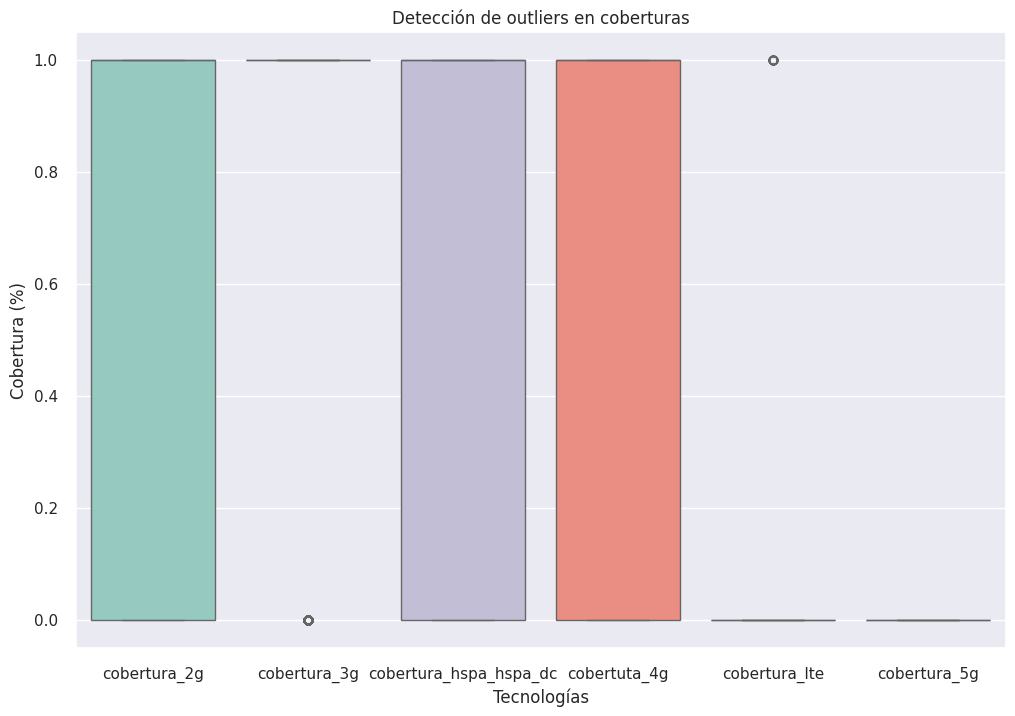

In [37]:
# 1. Boxplots para identificar outliers
plt.figure(figsize=(12,8))
sns.boxplot(data=df[cols_cobertura], palette="Set3")
plt.title("Detección de outliers en coberturas")
plt.xlabel("Tecnologías")
plt.ylabel("Cobertura (%)")
plt.show()


In [38]:
# 2. Cálculo de outliers con método IQR
# Función para detectar outliers con IQR
def detectar_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers = df[(df[col] < limite_inferior) | (df[col] > limite_superior)]
    return outliers

# Detectar outliers
outliers_dict = {}
for col in cols_cobertura:
    outliers_dict[col] = detectar_outliers(col)
    print(f"{col.upper()} → {len(outliers_dict[col])} outliers detectados")


COBERTURA_2G → 0 outliers detectados
COBERTURA_3G → 212 outliers detectados
COBERTURA_HSPA_HSPA_DC → 0 outliers detectados
COBERTUTA_4G → 0 outliers detectados
COBERTURA_LTE → 31 outliers detectados
COBERTURA_5G → 0 outliers detectados


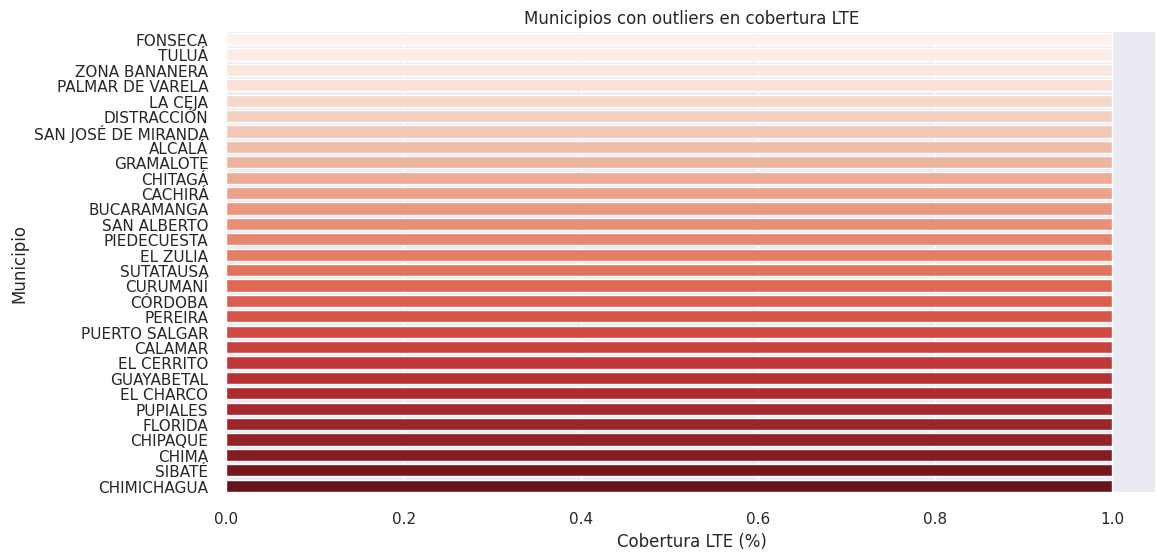

In [41]:
# 3. Visualización de outliers por municipio
outliers_lte = outliers_dict["cobertura_lte"]

plt.figure(figsize=(12,6))
sns.barplot(x=outliers_lte["cobertura_lte"], y=outliers_lte[col_mpio], hue=outliers_lte[col_mpio], palette="Reds", legend=False)
plt.title("Municipios con outliers en cobertura LTE")
plt.xlabel("Cobertura LTE (%)")
plt.ylabel("Municipio")
plt.show()

Porcentaje de nulos por tecnología:
 cobertura_2g              0.0
cobertura_3g              0.0
cobertura_hspa_hspa_dc    0.0
cobertuta_4g              0.0
cobertura_lte             0.0
cobertura_5g              0.0
dtype: float64


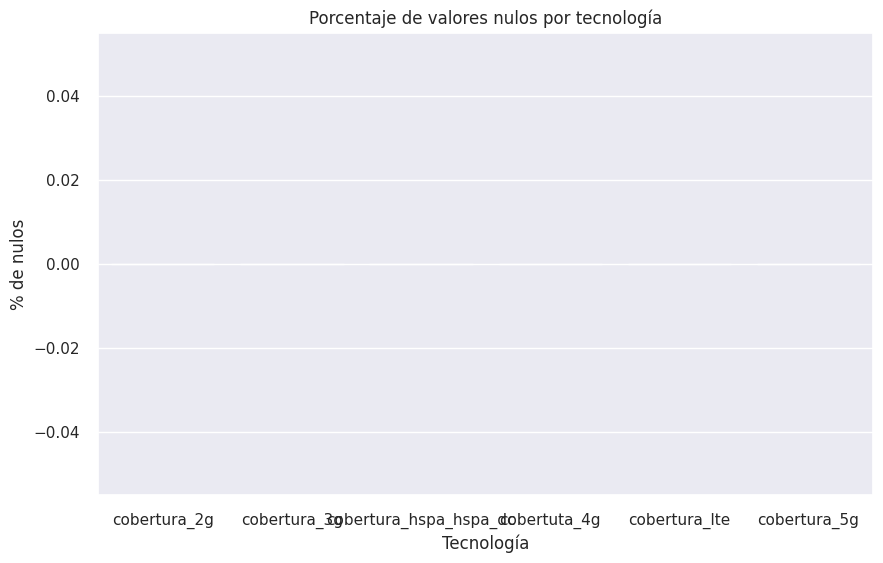

In [43]:
# 4. Análisis de valores faltantes
nulos = df[cols_cobertura].isnull().mean() * 100
print("Porcentaje de nulos por tecnología:\n", nulos)

plt.figure(figsize=(10,6))
sns.barplot(x=nulos.index, y=nulos.values, hue=nulos.index, palette="Greens", legend=False)
plt.title("Porcentaje de valores nulos por tecnología")
plt.ylabel("% de nulos")
plt.xlabel("Tecnología")
plt.show()

### Hallazgos Día 6
- Los boxplots muestran valores extremos en varias tecnologías, especialmente en LTE y 5G.
- El método IQR confirma la presencia de outliers en municipios con coberturas muy altas o muy bajas.
- Los outliers en LTE se concentran en pocos municipios, lo que refleja desigualdad territorial.
- El análisis de valores faltantes evidencia que 5G sigue siendo la tecnología con más datos nulos.
- Estos hallazgos refuerzan la necesidad de limpiar y validar los datos antes de modelos predictivos.


# Dia 7

In [44]:
# Preparación de estilo y utilidades
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Estilo consistente y accesible
sns.set_context("talk")
sns.set_theme(style="whitegrid", palette="colorblind")
plt.rcParams.update({
    "figure.dpi": 120,
    "savefig.dpi": 300,
    "figure.figsize": (10, 6),
    "font.size": 12,
    "axes.titlesize": 14,
    "axes.labelsize": 12
})

def exportar_fig(nombre_base):
    plt.tight_layout()
    plt.savefig(f"{nombre_base}.png", transparent=True)
    plt.savefig(f"{nombre_base}.svg", transparent=True)
    plt.show()

# Verificación rápida de columnas
# cols_cobertura, col_mpio, col_depto
print("Columnas cobertura:", cols_cobertura)
print("Col municipio:", col_mpio, "| Col departamento:", col_depto)


Columnas cobertura: ['cobertura_2g', 'cobertura_3g', 'cobertura_hspa_hspa_dc', 'cobertuta_4g', 'cobertura_lte', 'cobertura_5g']
Col municipio: municipio | Col departamento: departamento


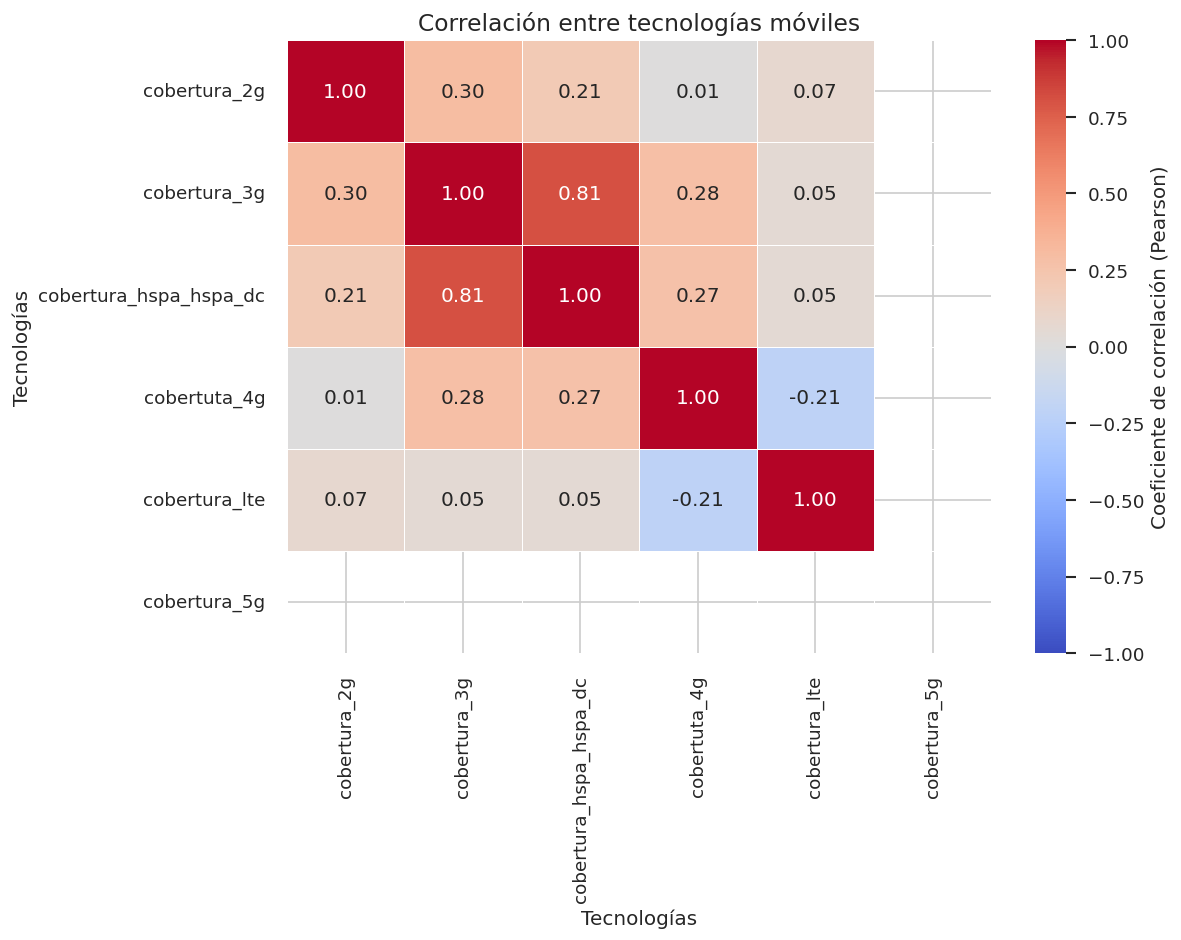

In [45]:
# Gráfico 1: Mapa de calor de correlación entre tecnologías
# Matriz de correlación con etiqueta clara y rangos
corr = df[cols_cobertura].corr(method="pearson")

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1,
    linewidths=0.5, cbar_kws={"label": "Coeficiente de correlación (Pearson)"}
)
plt.title("Correlación entre tecnologías móviles")
plt.xlabel("Tecnologías")
plt.ylabel("Tecnologías")
exportar_fig("01_heatmap_correlaciones")


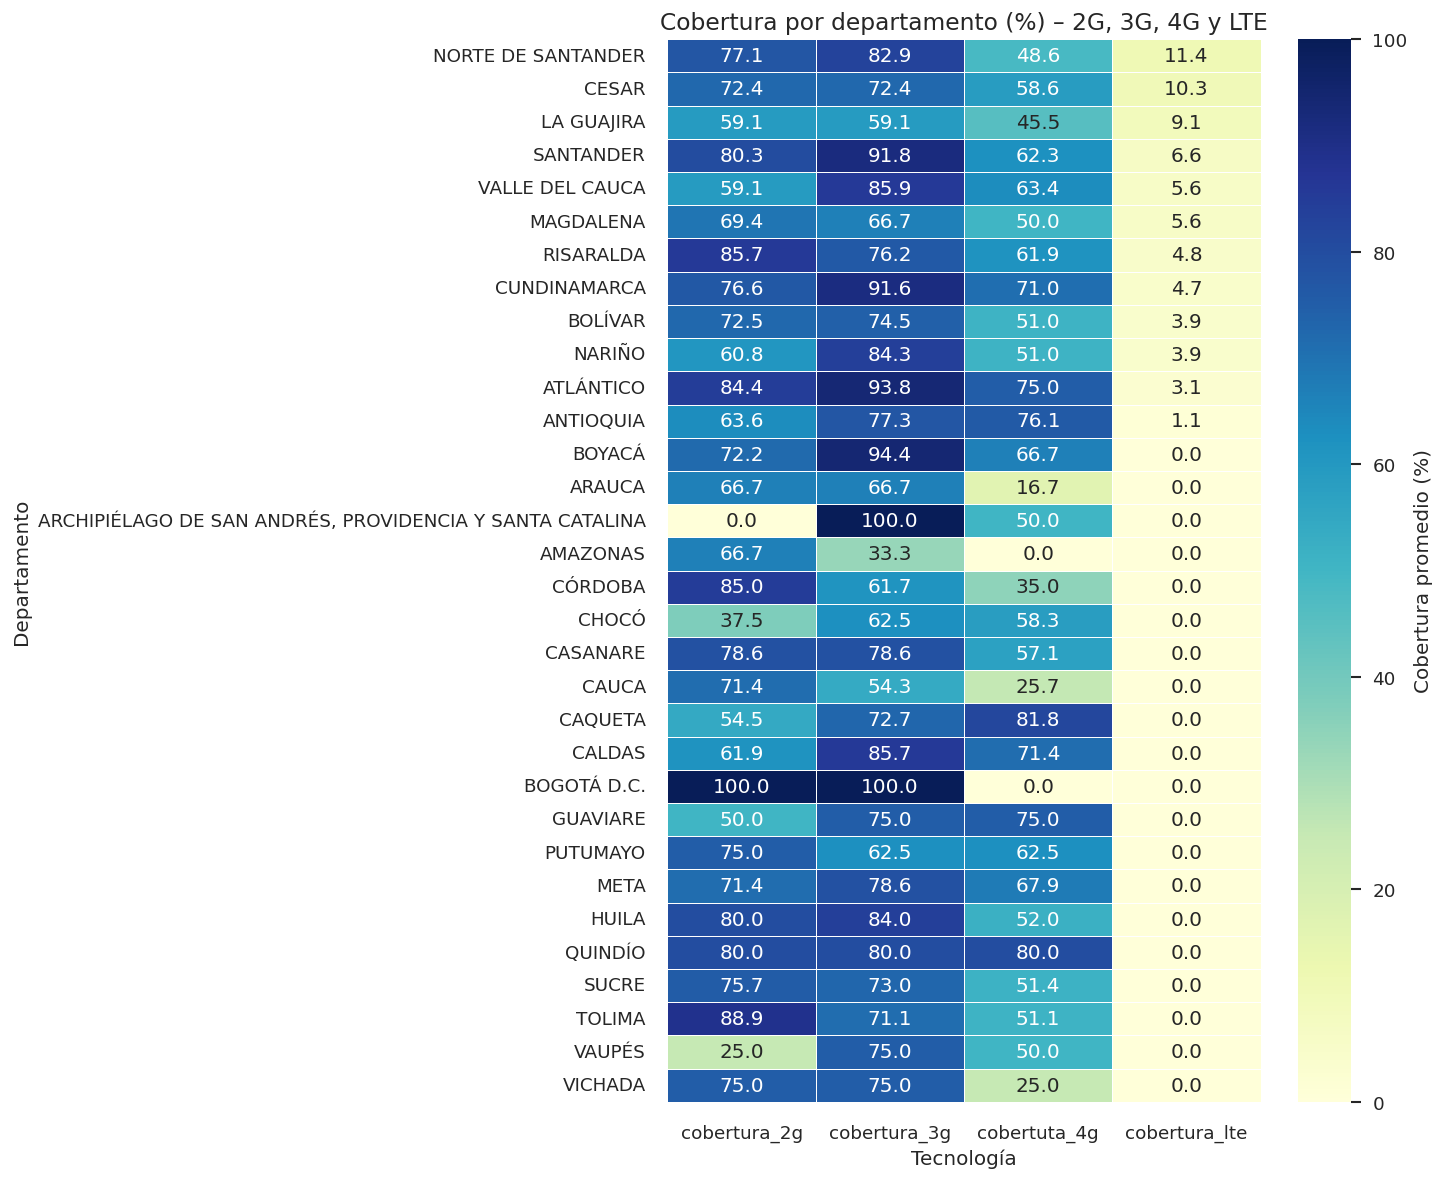

In [47]:
# Gráfico 2: Mapa de calor por departamento (2G, 3G, 4G, LTE)
# Promedios por departamento y orden por LTE
depto_mean = (df.groupby(col_depto)[["cobertura_2g","cobertura_3g","cobertuta_4g","cobertura_lte"]]
              .mean().mul(100).round(2).sort_values(by="cobertura_lte", ascending=False))

plt.figure(figsize=(12, 10))
sns.heatmap(
    depto_mean, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=0.5,
    cbar_kws={"label": "Cobertura promedio (%)"}
)
plt.title("Cobertura por departamento (%) – 2G, 3G, 4G y LTE")
plt.xlabel("Tecnología")
plt.ylabel("Departamento")
exportar_fig("02_heatmap_departamentos")

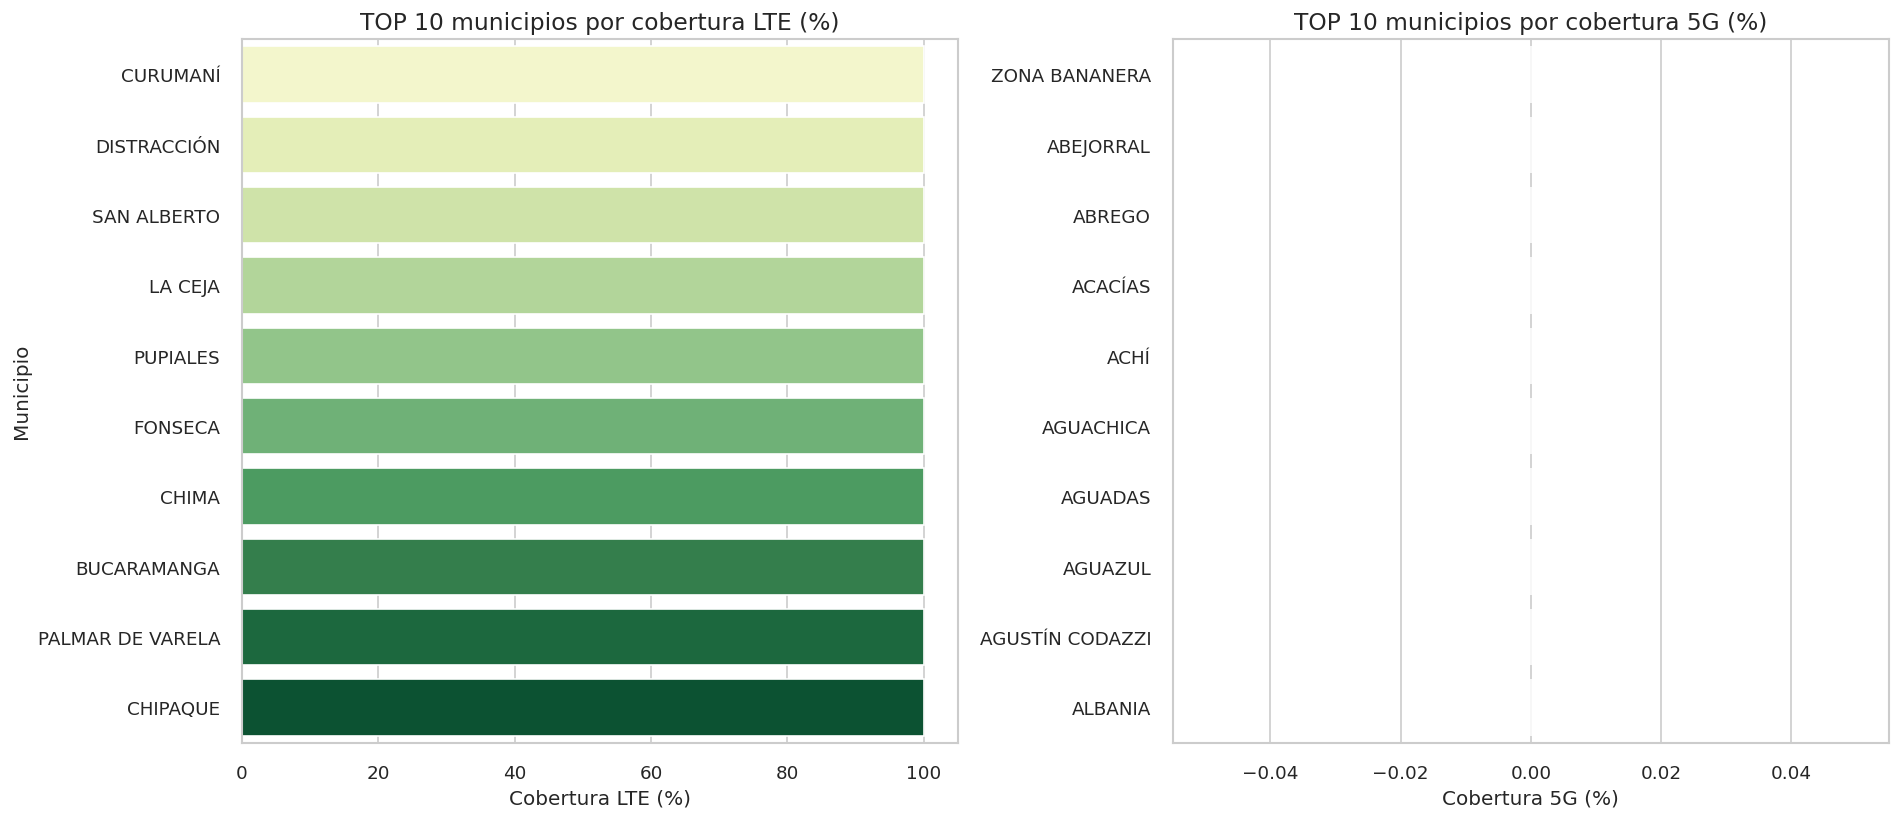

In [49]:
# Gráfico 3: Barras TOP 10 municipios en LTE y 5G
# Promedios municipales y rankings
mpio_mean = df.groupby(col_mpio)[cols_cobertura].mean().mul(100).round(2)

top10_lte = mpio_mean.sort_values(by="cobertura_lte", ascending=False).head(10)
top10_5g  = mpio_mean.sort_values(by="cobertura_5g",  ascending=False).head(10)

fig, axes = plt.subplots(1, 2, figsize=(16, 7))

sns.barplot(x=top10_lte["cobertura_lte"], y=top10_lte.index, hue=top10_lte.index, ax=axes[0], palette="YlGn", legend=False)
axes[0].set_title("TOP 10 municipios por cobertura LTE (%)")
axes[0].set_xlabel("Cobertura LTE (%)")
axes[0].set_ylabel("Municipio")

sns.barplot(x=top10_5g["cobertura_5g"], y=top10_5g.index, hue=top10_5g.index, ax=axes[1], palette="OrRd", legend=False)
axes[1].set_title("TOP 10 municipios por cobertura 5G (%)")
axes[1].set_xlabel("Cobertura 5G (%)")
axes[1].set_ylabel("")

plt.tight_layout()
exportar_fig("03_top10_municipios_lte_5g")

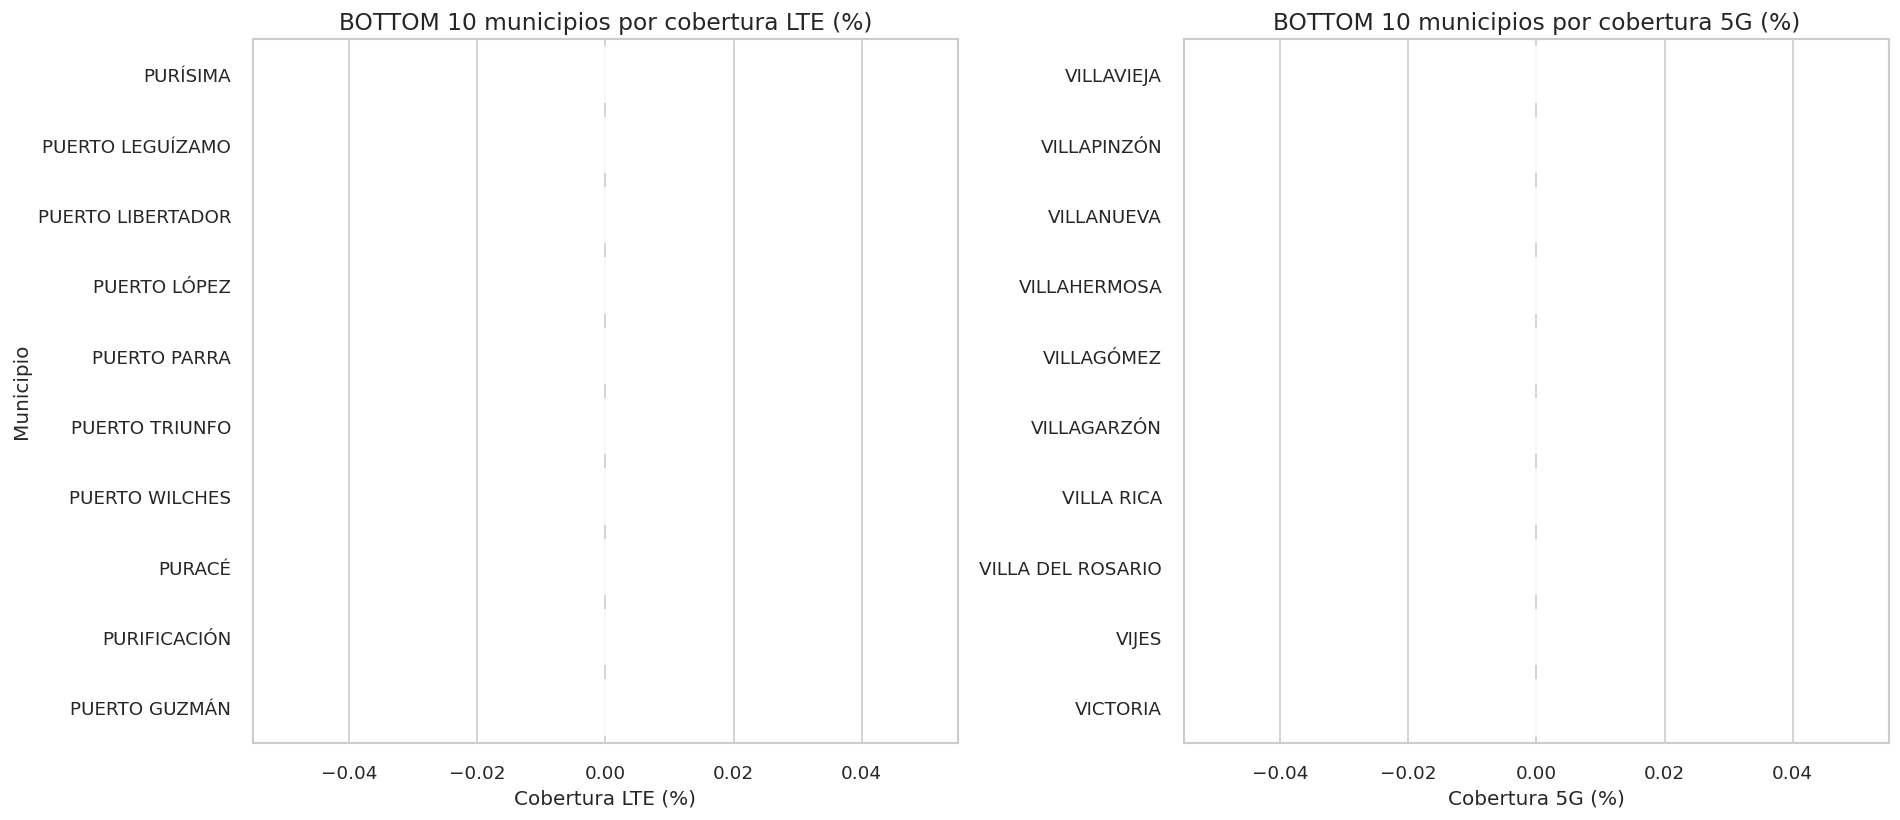

In [51]:
# Gráfico 4: Barras BOTTOM 10 municipios en LTE y 5G
bottom10_lte = mpio_mean.sort_values(by="cobertura_lte", ascending=True).head(10)
bottom10_5g  = mpio_mean.sort_values(by="cobertura_5g",  ascending=True).head(10)

fig, axes = plt.subplots(1, 2, figsize=(16, 7))

sns.barplot(x=bottom10_lte["cobertura_lte"], y=bottom10_lte.index, hue=bottom10_lte.index, ax=axes[0], palette="Blues", legend=False)
axes[0].set_title("BOTTOM 10 municipios por cobertura LTE (%)")
axes[0].set_xlabel("Cobertura LTE (%)")
axes[0].set_ylabel("Municipio")

sns.barplot(x=bottom10_5g["cobertura_5g"], y=bottom10_5g.index, hue=bottom10_5g.index, ax=axes[1], palette="Purples", legend=False)
axes[1].set_title("BOTTOM 10 municipios por cobertura 5G (%)")
axes[1].set_xlabel("Cobertura 5G (%)")
axes[1].set_ylabel("")

plt.tight_layout()
exportar_fig("04_bottom10_municipios_lte_5g")

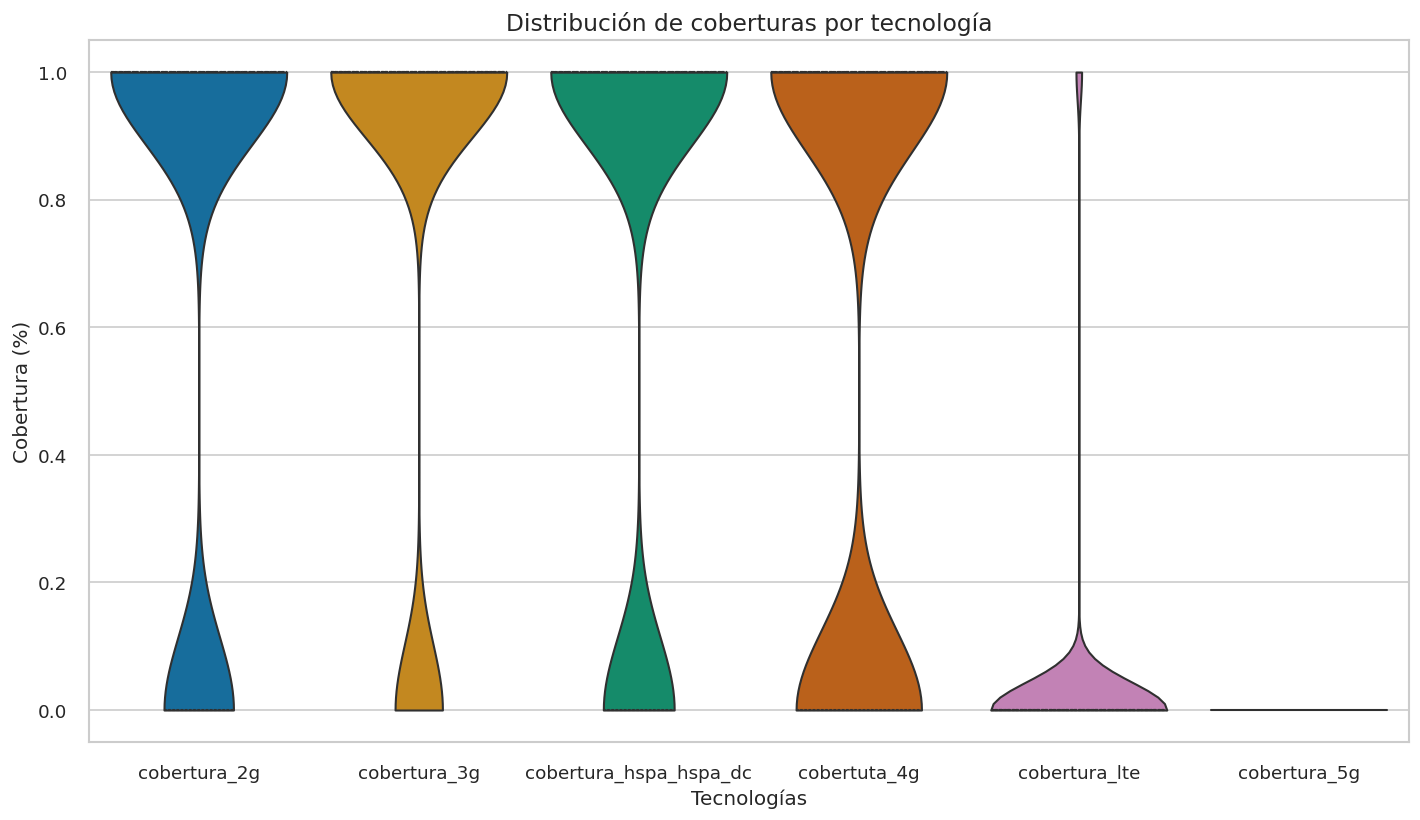

In [52]:
# Gráfico 5: Distribuciones comparativas
# Violines
plt.figure(figsize=(12, 7))
sns.violinplot(data=df[cols_cobertura], inner="quartile", cut=0)
plt.title("Distribución de coberturas por tecnología")
plt.xlabel("Tecnologías")
plt.ylabel("Cobertura (%)")
exportar_fig("05_violines_coberturas")


### Hallazgos Día 7
- Los gráficos definitivos evidencian correlaciones fuertes en tecnologías intermedias (3G/HSPA) y menores en 5G.
- Los heatmaps por departamento muestran concentración de 4G/LTE en regiones específicas y rezago en otras.
- Los rankings TOP/BOTTOM confirman desigualdad territorial en LTE y 5G.
- Las distribuciones por tecnología muestran mayor dispersión en LTE y 5G frente a 2G/3G.
- Las visualizaciones están listas y exportadas para integrar en informe y presentación.
